<a href="https://colab.research.google.com/github/cwp-kr/ML-class/blob/main/6%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

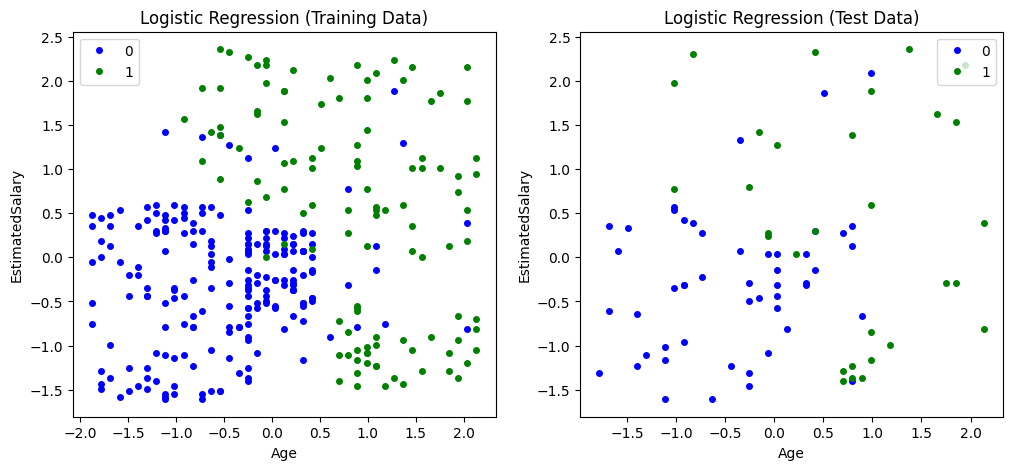

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

x1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv', usecols=['Age']).values
x2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv', usecols=['EstimatedSalary']).values
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv', usecols=['Purchased']).values

X = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size= 0.2)


C1_train = np.where(y_train == True)[0]
C0_train = np.where(y_train == False)[0]

C1_test = np.where(y_test == True)[0]
C0_test = np.where(y_test == False)[0]


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(X_train[C0_train, 0], X_train[C0_train, 1], 'bo', markersize=4, label='0')
axes[0].plot(X_train[C1_train, 0], X_train[C1_train, 1], 'go', markersize=4, label='1')
axes[0].set_title('Logistic Regression (Training Data)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('EstimatedSalary')
axes[0].legend(loc=2)

axes[1].plot(X_test[C0_test, 0], X_test[C0_test, 1], 'bo', markersize=4, label='0')
axes[1].plot(X_test[C1_test, 0], X_test[C1_test, 1], 'go', markersize=4, label='1')
axes[1].set_title('Logistic Regression (Test Data)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('EstimatedSalary')
axes[1].legend(loc=1)
plt.show()

In [29]:
def h(x,w):
    return 1/(1 + np.exp(-x@w))

In [39]:
w = np.zeros([3,1])
Xt = np.hstack([np.ones((320, 1)), X_train])

alpha = 0.01

for i in range(10000):
    df = -Xt.T@(y_train - h(Xt,w))
    w = w - alpha*df

wt = np.zeros([3,1])
Xtt = np.hstack([np.ones((80, 1)), X_test])

alpha = 0.01

for i in range(10000):
    df = -Xtt.T@(y_test - h(Xtt,wt))
    wt = wt - alpha*df

print(w)
print(wt)

[[-1.30309553]
 [ 2.78509221]
 [ 1.46752383]]
[[-0.78757626]
 [ 1.70696444]
 [ 0.69264792]]


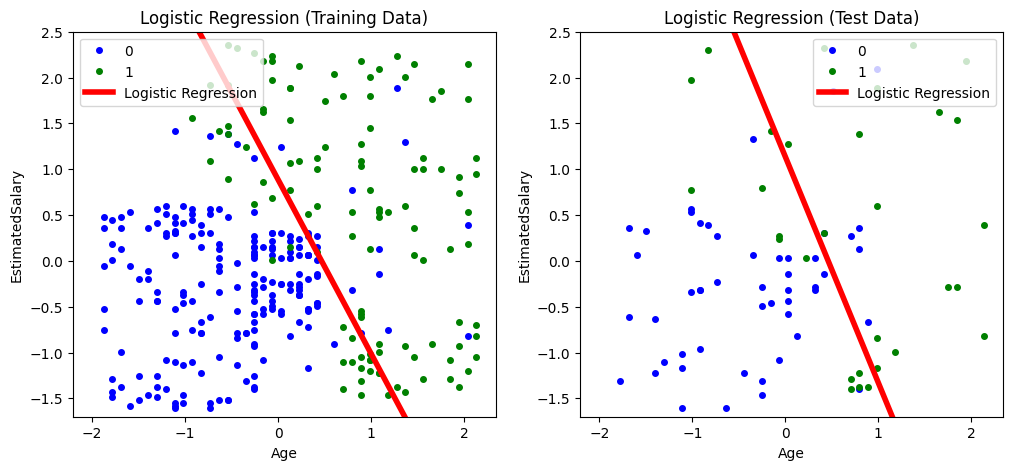

In [43]:
xp = np.linspace(-2,2,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]
ypt = - wt[1,0]/wt[2,0]*xp - wt[0,0]/wt[2,0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(X_train[C0_train, 0], X_train[C0_train, 1], 'bo', markersize=4, label='0')
axes[0].plot(X_train[C1_train, 0], X_train[C1_train, 1], 'go', markersize=4, label='1')
axes[0].plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
axes[0].set_title('Logistic Regression (Training Data)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('EstimatedSalary')
axes[0].set_ylim([-1.7,2.5])
axes[0].legend(loc=2)

axes[1].plot(X_test[C0_test, 0], X_test[C0_test, 1], 'bo', markersize=4, label='0')
axes[1].plot(X_test[C1_test, 0], X_test[C1_test, 1], 'go', markersize=4, label='1')
axes[1].plot(xp, ypt, 'r', linewidth = 4, label = 'Logistic Regression')
axes[1].set_title('Logistic Regression (Test Data)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('EstimatedSalary')
axes[1].set_ylim([-1.7,2.5])
axes[1].legend(loc=1)
plt.show()

In [48]:
clf = linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(np.asarray(X_train), np.ravel(y_train))

clft = linear_model.LogisticRegression(solver = 'lbfgs')
clft.fit(np.asarray(X_test), np.ravel(y_test))

LogisticRegression()

In [49]:
clf.coef_

array([[2.46852464, 1.30044225]])

In [50]:
clft.coef_

array([[1.45545439, 0.60507485]])

In [47]:
clf.intercept_

array([-1.20236194])

In [51]:
clft.intercept_

array([-0.73409856])

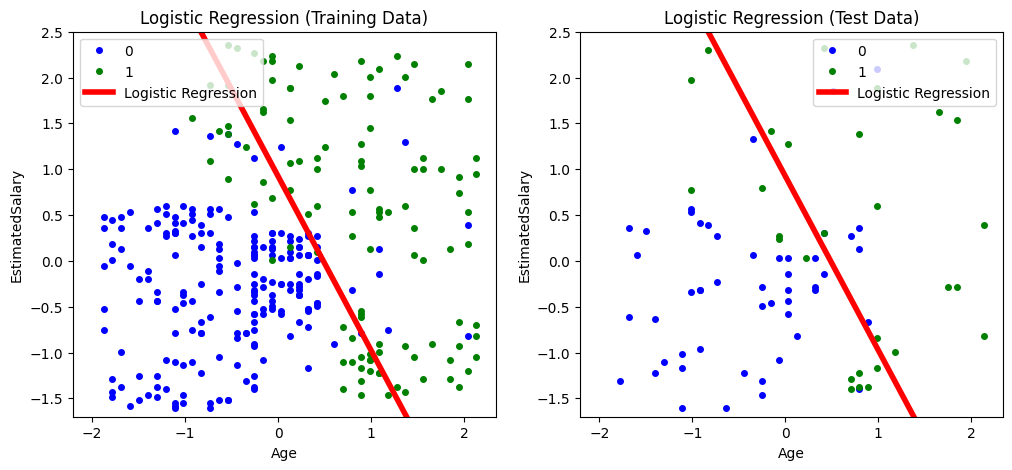

In [52]:
sw0 = clf.intercept_[0]
sw1 = clf.coef_[0,0]
sw2 = clf.coef_[0,1]

tw0 = clf.intercept_[0]
tw1 = clf.coef_[0,0]
tw2 = clf.coef_[0,1]

xp = np.linspace(-2,2,100).reshape(-1,1)
yp = - sw1/sw2*xp - sw0/sw2
ypt = - tw1/tw2*xp - tw0/tw2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(X_train[C0_train, 0], X_train[C0_train, 1], 'bo', markersize=4, label='0')
axes[0].plot(X_train[C1_train, 0], X_train[C1_train, 1], 'go', markersize=4, label='1')
axes[0].plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
axes[0].set_title('Logistic Regression (Training Data)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('EstimatedSalary')
axes[0].set_ylim([-1.7,2.5])
axes[0].legend(loc=2)

axes[1].plot(X_test[C0_test, 0], X_test[C0_test, 1], 'bo', markersize=4, label='0')
axes[1].plot(X_test[C1_test, 0], X_test[C1_test, 1], 'go', markersize=4, label='1')
axes[1].plot(xp, ypt, 'r', linewidth = 4, label = 'Logistic Regression')
axes[1].set_title('Logistic Regression (Test Data)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('EstimatedSalary')
axes[1].set_ylim([-1.7,2.5])
axes[1].legend(loc=1)
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
result = accuracy_score(y_test, y_pred)

print(y_pred)
print("Accuracy:", result)

[0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 1 0]
Accuracy: 0.75


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
